In [58]:
# Briann Steven Gómez - Grupo 77 - Análisis de datos
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Análisis exploratorio de los datos

In [4]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')


## 2. Preprocesamiento de datos

In [7]:
# Preprocesamiento de los datos
Datos = Datos.drop(columns='name')
X = Datos.drop(columns='selling_price')
y = Datos['selling_price']

## 3. Características más relevantes

In [53]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=300)

## 4. Entrenar el modelo

In [54]:
# Modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('model', LinearRegression())])

In [55]:
# Predicciones
y_pred = pipeline.predict(X_test)

## 5. Evaluar el desempeño del modelo

In [56]:
# Evaluación
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.7)
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 161764.55845749954
MSE: 43022054169.01968
RMSE: 27770506.442880828
R2 Score: 0.7359221453007463


## 6. Gráficos de resultados

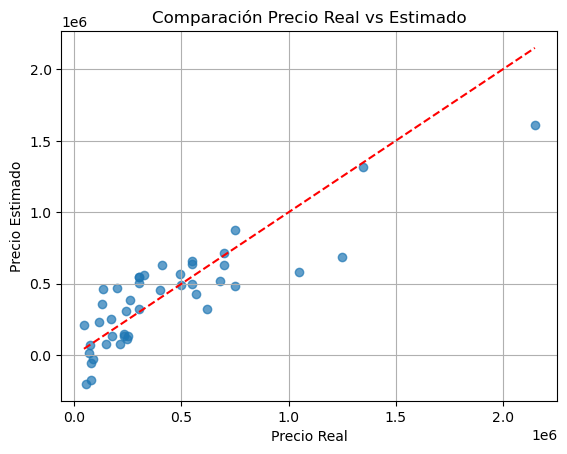

In [57]:
# Gráfica de comparación
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Precio Real')
plt.ylabel('Precio Estimado')
plt.title('Comparación Precio Real vs Estimado')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 7. Interpretación de resultados

- Error significativo: El MAE (161,764.56) y RMSE (27,770,506.44) indican un error absoluto promedio significativo en las predicciones del modelo.- 
Ajuste razonable: El R2 Score (0.7359) sugiere un ajuste razonable del modelo a los datos, explicando aproximadamente el 73.59% de la variabilidad en los valores reales.
- 
Posibles mejoras: El MSE (43,022,054,169.02) grande sugiere posibles errores significativos en las predicciones